In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from calendar import weekday
from scipy.stats import linregress

In [23]:
awards=pd.read_csv('Recent_Contract_Awards.csv')

c:\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12,13,14,15,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
awards.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20100628021,07/06/2010,07/06/2010,Transportation,Award,Services (other than human services),NOTICE OF AWARD OF CONCESSION AT EAST RIVER PI...,Competitive Sealed Bids,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214010,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Public Bid,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20090911004,09/18/2009,09/18/2009,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,Other (Describe below in Other Legally Mandate...,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20130415019,04/22/2013,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20110623031,06/24/2011,06/24/2011,Transportation,Award,Services (other than human services),AIRPORT BUS FRANCHISE NOTICE OF AWARD,Request for Proposals,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(awards.columns)

Index(['RequestID', 'StartDate', 'EndDate', 'AgencyName',
       'TypeOfNoticeDescription', 'CategoryDescription', 'ShortTitle',
       'SelectionMethodDescription', 'SectionName',
       'SpecialCaseReasonDescription', 'PIN', 'DueDate', 'AddressToRequest',
       'ContactName', 'ContactPhone', 'Email', 'ContractAmount', 'ContactFax',
       'AdditionalDescription1', 'AdditionalDesctription2',
       'AdditionalDescription3', 'OtherInfo1', 'OtherInfo2', 'OtherInfo3',
       'VendorName', 'VendorAddress', 'Printout1', 'Printout2', 'Printout3',
       'DocumentLinks', 'EventDate', 'EventBuildingName',
       'EventStreetAddress1', 'EventStreetAddress2', 'EventCity',
       'EventStateCode', 'EventZipCode'],
      dtype='object')


In [24]:
awards['StartYear']=pd.to_numeric(awards.StartDate.str[-4:])

In [25]:
awards=awards[(awards['StartYear']<=2019) & (awards['StartYear']>=2010)]

In [26]:
awards=awards[(awards['ContractAmount']>0) & awards['ContractAmount'].notnull()]
print(awards.shape)

(18198, 38)


In [33]:
print(awards.ContractAmount.sum())

207783994327.83997


In [35]:
print(awards.AgencyName.value_counts().to_string())

Citywide Administrative Services                      5098
Health and Mental Hygiene                             2145
Dept Of Social Svcs/Human Resources Administration    1822
Design and Construction                               1454
Administration for Children's Services                 892
Environmental Protection                               814
Housing Preservation and Development                   745
Parks and Recreation                                   709
Aging                                                  548
Transportation                                         545
Comptroller                                            494
Homeless Services                                      493
Information Technology and Telecommunications          352
Sanitation                                             261
Correction                                             232
Police                                                 200
Employees' Retirement System                           1

In [39]:
top5_agencies=[agency for agency in awards.AgencyName.value_counts().head(5).keys()]
print(top5_agencies)

['Citywide Administrative Services', 'Health and Mental Hygiene', 'Dept Of Social Svcs/Human Resources Administration', 'Design and Construction', "Administration for Children's Services"]


In [61]:
top5_agencies_awards=awards[awards['AgencyName'].isin(top5_agencies)]

In [43]:
print(top5_agencies_awards.shape)
print(top5_agencies_awards.AgencyName.value_counts())

(11411, 38)
Citywide Administrative Services                      5098
Health and Mental Hygiene                             2145
Dept Of Social Svcs/Human Resources Administration    1822
Design and Construction                               1454
Administration for Children's Services                 892
Name: AgencyName, dtype: int64


In [62]:
top5_agencies_awards=top5_agencies_awards.groupby(['AgencyName']).mean()
top5_agencies_awards.sort_values('ContractAmount',inplace=True)
top5_agencies_awards=top5_agencies_awards['ContractAmount']

In [63]:
print(top5_agencies_awards)

AgencyName
Citywide Administrative Services                      3.794259e+06
Dept Of Social Svcs/Human Resources Administration    5.514949e+06
Administration for Children's Services                6.911672e+06
Design and Construction                               1.076263e+07
Health and Mental Hygiene                             5.157880e+07
Name: ContractAmount, dtype: float64


In [64]:
print(top5_agencies_awards.iloc[-1]/top5_agencies_awards.iloc[-2])

4.792395919467627


In [73]:
CAS=awards[awards['AgencyName']=='Citywide Administrative Services']

In [74]:
CAS_per_vendor=CAS.groupby(['VendorName']).sum()
CAS_per_vendor.sort_values('ContractAmount',inplace=True)
CAS_per_vendor=CAS_per_vendor['ContractAmount']

In [83]:
print(sum(CAS.VendorName.value_counts().head(50))/sum(CAS.VendorName.value_counts()))

0.16575127500980777


In [84]:
PAR=awards[awards['AgencyName']=='Parks and Recreation']

In [87]:
month_day=PAR.StartDate.str.split('/')

In [96]:
PAR['StartDay']=pd.to_numeric(month_day.str.get(1))
PAR['StartMonth']=pd.to_numeric(month_day.str.get(0))

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
def day_of_the_week(year,month,day):
    days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return days[weekday(year,month,day)]

In [99]:
PAR['Weekday']=PAR.apply(lambda row: day_of_the_week(row['StartYear'],row['StartMonth'],row['StartDay']),axis=1)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
print(PAR.Weekday.value_counts())

Tuesday      163
Friday       152
Wednesday    145
Monday       130
Thursday     119
Name: Weekday, dtype: int64


In [102]:
expected=PAR.Weekday.value_counts().sum()/5
chi_sq=0
for i in range(len(PAR.Weekday.value_counts())):
    chi_sq+=(PAR.Weekday.value_counts()[i]-expected)**2/expected

In [103]:
print(expected)
print(chi_sq)

141.8
8.623413258110013


In [104]:
from scipy.stats import chisquare
print(chisquare(PAR.Weekday.value_counts()))

Power_divergenceResult(statistic=8.623413258110013, pvalue=0.07123340164293498)


In [105]:
print(awards.CategoryDescription.value_counts())

Human Services/Client Services          5476
Goods                                   5329
Services (other than human services)    3225
Construction/Construction Services      2293
Goods and Services                       973
Construction Related Services            902
Name: CategoryDescription, dtype: int64


In [159]:
construction=awards[awards.CategoryDescription=='Construction/Construction Services']

In [160]:
print(construction.ShortTitle.head(10))

30     REQUIREMENTS CONTRACT FOR UPGRADING OF UNDERGR...
140    CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...
142    DORM K ELEVATOR REPLACEMENT AT ANNA M. KROSS...
144                             NON-EMERGENCY DEMOLITION
152                   ELEVATOR UPGRADE, 80 CENTRE STREET
162                       IMMEDIATE EMERGENCY DEMOLITION
170    FOREST HILLS BRANCH LIBRARY ROOF REPLACEMENTS-...
173       JOC-13-EH: JOB ORDER CONTRACT HVAC EAST REGION
176                             NON-EMERGENCY DEMOLITION
179    ON-CALL CONTRACT FOR PROJECT MANAGEMENT AND RE...
Name: ShortTitle, dtype: object


In [235]:
c_park=construction.ShortTitle.str.contains('(?:^|\W)(CENTRAL PARK)(?:$|\W)')
w_park=construction.ShortTitle.str.contains('(?:^|\W)(WASHINGTON SQUARE PARK)(?:$|\W)')
all_parks=construction.ShortTitle.str.contains('(?:^|\W)(PARK)(?:$|\W)')

In [236]:
c_park_construction=construction[c_park]
w_park_construction=construction[w_park]
all_park_construction=construction[all_parks]

In [237]:
print(c_park_construction.ShortTitle.head())
print(w_park_construction.ShortTitle.head())
print(all_park_construction.ShortTitle.head())

519    INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN ...
Name: ShortTitle, dtype: object
32835    WATER MAIN CONNECTION AT WASHINGTON SQUARE PAR...
Name: ShortTitle, dtype: object
380     QUEENS THEATRE IN THE PARK, ORIGINAL CIRCULAR ...
519     INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN ...
1117    CONSTRUCTION OF STARLIGHT PARK-PHASE II, STAGE...
1847    RECONSTRUCTION OF RUNNING TRACK AND ADJACENT F...
2624               RECONSTRUCTION OF JACKIE ROBINSON PARK
Name: ShortTitle, dtype: object


In [238]:
print(c_park_construction.ContractAmount.sum()/w_park_construction.ContractAmount.sum())

1.438993463252562


In [239]:
month_day=awards.StartDate.str.split('/')
awards['StartDay']=pd.to_numeric(month_day.str.get(1))
awards['StartMonth']=pd.to_numeric(month_day.str.get(0))
awards['Weekday']=awards.apply(lambda row: day_of_the_week(row['StartYear'],row['StartMonth'],row['StartDay']),axis=1)

In [241]:
EPA=awards[awards.AgencyName=='Environmental Protection']

In [242]:
EPA.sort_values(['StartYear','StartMonth','StartDay'],inplace=True)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [259]:
EPA_grouped=EPA.groupby(['StartYear','StartMonth']).sum().reset_index()

In [249]:
EPA_expenditure=np.zeros((10*12,))
years=np.arange(2010,2020)
months=np.arange(1,13)

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [278]:
k=0
for i in range(10):
    for j in range(12):
        if (EPA_grouped.StartYear.iloc[k]==years[i]) and (EPA_grouped.StartMonth.iloc[k]==months[j]):
            EPA_expenditure[i*12+j]=EPA_grouped.ContractAmount.iloc[k]
            k+=1

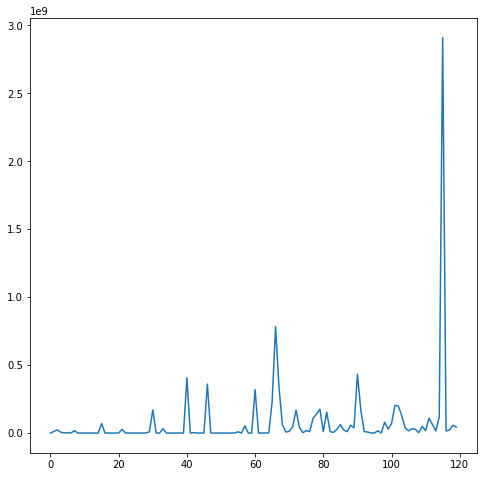

In [281]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.plot(EPA_expenditure)

In [288]:
autocorrelation=np.correlate(EPA_expenditure,EPA_expenditure,mode='full')
autocorrelation=autocorrelation[int(len(autocorrelation)/2):]
print(autocorrelation[12])

8.90520572789052e+17


In [292]:
norm_EPA_expenditure=(EPA_expenditure-np.mean(EPA_expenditure))/np.std(EPA_expenditure)
norm_autocorrelation=np.correlate(norm_EPA_expenditure,norm_EPA_expenditure,mode='full')
norm_autocorrelation=norm_autocorrelation[int(len(norm_autocorrelation)/2):]
print(norm_autocorrelation[12])

5.256653152320387


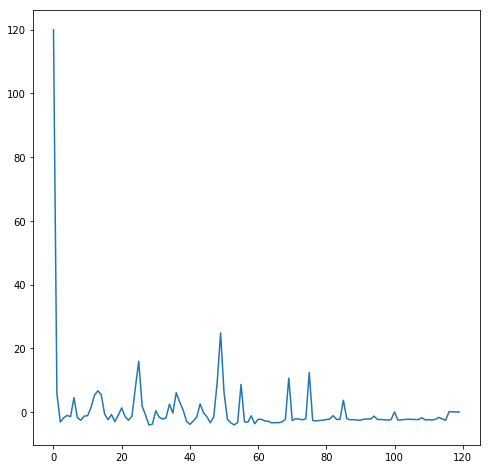

In [293]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.plot(norm_autocorrelation)

In [296]:
CAS_goods=awards[(awards['AgencyName']=='Citywide Administrative Services') & (awards['CategoryDescription']=='Goods')]

In [301]:
CAS_goods_val=np.array(CAS_goods.groupby('StartYear').sum().ContractAmount.values)

r-value = 0.5998970133980953


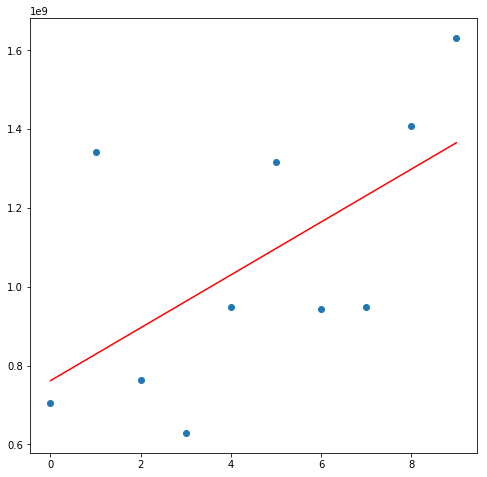

In [303]:
years_since_2010=np.arange(0,10)
slope, intercept, r_value, p_value, std_err = linregress(years_since_2010,CAS_goods_val)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.plot(years_since_2010,CAS_goods_val,'o')
ax.plot(years_since_2010,slope*years_since_2010+intercept,'r-')
print('r-value = {}'.format(r_value))

In [339]:
awards_2018=awards[awards['StartYear']==2018]

In [353]:
NYC_zipcodes=[10453, 10457, 10460,10458, 10467, 10468,10451, 10452, 10456,10454, 10455, 10459, 10474,10463,10471,10466, 10469, 10470, 10475,\
10461, 10462,10464, 10465, 10472, 10473,11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,\
11234, 11236, 11239,11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,\
11211, 11222,11220, 11232,11206, 11221, 11237,10026, 10027, 10030, 10037, 10039,10001, 10011, 10018, 10019, 10020, 10036,\
10029, 10035,10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,\
10021, 10028, 10044, 10065, 10075, 10128,10023, 10024, 10025,10031, 10032, 10033, 10034, 10040,11361, 11362, 11363, 11364,\
11354, 11355, 11356, 11357, 11358, 11359, 11360,11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,\
11101, 11102, 11103, 11104, 11105, 11106,11374, 11375, 11379, 11385,11691, 11692, 11693, 11694, 11695, 11697,\
11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,\
11368, 11369, 11370, 11372, 11373, 11377, 11378,10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305,10314]
NYC_zipcodes=[str(x) for x in NYC_zipcodes]

In [348]:
awards_2018['ZipCode']=awards_2018.VendorAddress.str.extract('(?:$|\D)(\d{5})(?:$|\D)')

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [354]:
awards_2018_NYC=awards_2018[awards_2018['ZipCode'].isin(NYC_zipcodes)]
awards_2018_outside=awards_2018[~awards_2018['ZipCode'].isin(NYC_zipcodes)]

In [355]:
print(awards_2018_NYC.ZipCode.value_counts())
print(awards_2018_outside.ZipCode.value_counts())

10018    111
10001     82
10004     65
10038     45
11101     43
        ... 
10034      1
11366      1
11364      1
11004      1
10466      1
Name: ZipCode, Length: 159, dtype: int64
08873    50
11961    25
11801    19
11040    17
12203    15
         ..
10178     1
11726     1
11796     1
07608     1
14031     1
Name: ZipCode, Length: 454, dtype: int64


In [356]:
total_exp_NYC=awards_2018_NYC.ContractAmount.sum()
total_exp_outside=awards_2018_outside.ContractAmount.sum()
print(total_exp_NYC)
print(total_exp_outside)

6320989206.09
12422132563.939999
